In [101]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

import pathlib
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import pandas as pd
import numpy as np

In [2]:
with open('./dataset/fungi/train_images_cat.txt', 'r') as f:
    train_images_cat = f.readlines()
f.close()
with open('./dataset/fungi/val_images_cat.txt', 'r') as f:
    val_images_cat = f.readlines()
f.close()
len(train_images_cat), len(val_images_cat)

(85578, 4182)

In [3]:
train_images_cat[0]

'650@:@16390_Leucoagaricus_leucothites/OBL2010PIC27332400.JPG\n'

In [34]:
train_images_total = [i.split('@:@')[1].strip().strip('\n') for i in train_images_cat]
train_cats_total = [i.split('@:@')[0].strip().strip('\n') for i in train_images_cat]
train_images_total[0], train_cats_total[0]
# train_images = [
#     "./dataset/fungi/train/images/" + i.split('@:@')[-1].strip('\n') for i in train_images_cat
# ]
train_images = [str(i) for i in pathlib.Path('./dataset/fungi/train/').glob('**/*.JPG')]
# train_images[:3]
train_lbls = [
    i.split('@:@')[0].strip('\n') for i in train_images_cat
]
# train_lbls[:3]
len(train_images), len(train_lbls)
# train_images_names[:3]
train_images_names = ["/".join(str(i).split('/')[-2:]) for i in pathlib.Path('./dataset/fungi/train/').glob('**/*.JPG')]
train_images_names[:3]

('16390_Leucoagaricus_leucothites/OBL2010PIC27332400.JPG', '650')

In [94]:
df_full = pd.DataFrame([train_images_total, train_cats_total]).T
df_full.columns = ['file_name', 'label']
# df_full.head()
df_train = pd.DataFrame([train_images, train_lbls[:len(train_images)]]).T
df_train.columns = ['file_path', 'label']
df_train['label'] = df_train['label'].astype(int)
df_train['file_name'] = df_train['file_path'].apply(lambda x: "/".join(x.split('/')[-2:]))
# df_train.head()
df_train_real = pd.merge(left=df_full, right=df_train, on = 'file_name', how='inner')
df_train_real.drop(columns=['label_y'], inplace=True)
df_train_real['file_name'] = df_train_real['file_name'].apply(lambda x: x.split('/')[-1])
df_train_real.columns = ['file_name', 'label', 'file_path']
df_train_real['label_name'] = df_train_real['file_path'].apply(lambda x: x.split('/')[-2])
df_train_real['label'] = df_train_real['label'].astype(int)
df_train_real.shape

(21550, 4)

In [69]:
val_images_total = [i.split('@:@')[1].strip().strip('\n') for i in val_images_cat]
val_cats_total = [i.split('@:@')[0].strip().strip('\n') for i in val_images_cat]
# val_images_total[0], train_cats_total[0]
val_images = [str(i) for i in pathlib.Path('./dataset/fungi/val/').glob('**/*.JPG')]
val_lbls = [i.split('@:@')[0].strip('\n') for i in train_images_cat]
val_images_names = ["/".join(str(i).split('/')[-2:]) for i in pathlib.Path('./dataset/fungi/val/').glob('**/*.JPG')]
len(val_images), len(val_lbls), val_images_names[:3]

(4182,
 85578,
 ['19283_Pseudoplectania_nigrella/MS2009PIC20765591.JPG',
  '19283_Pseudoplectania_nigrella/TS2010PIC74426124.JPG',
  '19283_Pseudoplectania_nigrella/KNI2010PIC43820507.JPG'])

In [88]:
df_full = pd.DataFrame([val_images_total, val_cats_total]).T
df_full.columns = ['file_name', 'label']
# df_full.head()
df_val = pd.DataFrame([val_images, val_lbls[:len(val_images)]]).T
df_val.columns = ['file_path', 'label']
df_val['label'] = df_val['label'].astype(int)
df_val['file_name'] = df_val['file_path'].apply(lambda x: "/".join(x.split('/')[-2:]))
df_val_real = pd.merge(left=df_full, right=df_val, on = 'file_name', how='inner')
df_val_real.drop(columns=['label_y'], inplace=True)
df_val_real['file_name'] = df_val_real['file_name'].apply(lambda x: x.split('/')[-1])
df_val_real.columns = ['file_name', 'label', 'file_path']
df_val_real['label_name'] = df_val_real['file_path'].apply(lambda x: x.split('/')[-2])
df_val_real['label'] = df_val_real['label'].astype(int)
df_val_real.shape

(4182, 4)

In [92]:
df_val_real.head()

,file_name,label,file_path,label_name
0,JM2009PIC63194578.JPG,650,dataset/fungi/val/16390_Leucoagaricus_leucothi...,16390_Leucoagaricus_leucothites
1,JM2012PIC41096317.JPG,650,dataset/fungi/val/16390_Leucoagaricus_leucothi...,16390_Leucoagaricus_leucothites
2,MC2009PIC47538806.JPG,650,dataset/fungi/val/16390_Leucoagaricus_leucothi...,16390_Leucoagaricus_leucothites
3,MC2009PIC32048262.JPG,1158,dataset/fungi/val/40985_Byssomerulius_corium/M...,40985_Byssomerulius_corium
4,MC2017-9190218_rJ89bWx0l.JPG,1158,dataset/fungi/val/40985_Byssomerulius_corium/M...,40985_Byssomerulius_corium


In [72]:
del df_train, df_val, df_full

In [95]:
df_train_real.head()

,file_name,label,file_path,label_name
0,OBL2010PIC27332400.JPG,650,dataset/fungi/train/16390_Leucoagaricus_leucot...,16390_Leucoagaricus_leucothites
1,OBL2010PIC74504431.JPG,650,dataset/fungi/train/16390_Leucoagaricus_leucot...,16390_Leucoagaricus_leucothites
2,OBL2010PIC48004850.JPG,650,dataset/fungi/train/16390_Leucoagaricus_leucot...,16390_Leucoagaricus_leucothites
3,FDE2010PIC69596001.JPG,650,dataset/fungi/train/16390_Leucoagaricus_leucot...,16390_Leucoagaricus_leucothites
4,FDE2010PIC10410554.JPG,650,dataset/fungi/train/16390_Leucoagaricus_leucot...,16390_Leucoagaricus_leucothites


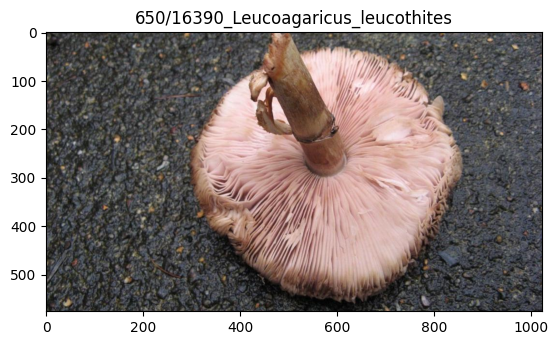

In [99]:
plt.imshow(Image.open(df_train_real.iloc[0,2]),);
# plt.legend(show=True)
plt.title(label=f"{str(df_train_real.iloc[0, 1])}/{str(df_train_real.iloc[0, -1])}")
plt.show()

In [81]:
df_val_real[df_val_real['label']==650]

,file_name,label,file_path
0,JM2009PIC63194578.JPG,650,dataset/fungi/val/16390_Leucoagaricus_leucothi...
1,JM2012PIC41096317.JPG,650,dataset/fungi/val/16390_Leucoagaricus_leucothi...
2,MC2009PIC47538806.JPG,650,dataset/fungi/val/16390_Leucoagaricus_leucothi...


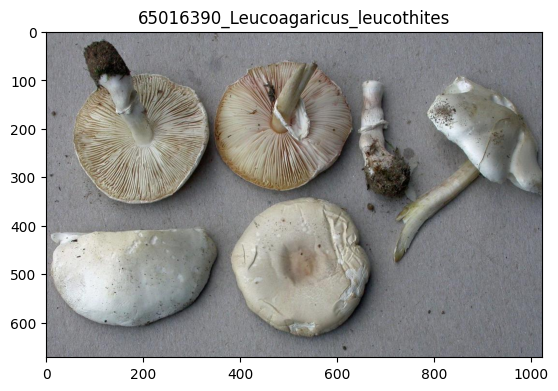

In [93]:
plt.imshow(Image.open(df_val_real.iloc[0,2]),);
# plt.legend(show=True)
plt.title(label=str(df_val_real.iloc[0, 1]) + str(df_val_real.iloc[0, -1]))
plt.show()


In [ ]:
# import shutil
# import os
# # os.makedirs("./dataset/fungi/val", exist_ok=True)
# for src in tqdm(train_images[:]):
#     os.makedirs("/".join(src.replace('fungi_train_val/images', 'train').split('/')[:-1]), exist_ok=True)
#     shutil.copyfile(src, src.replace('fungi_train_val/images', 'train'))
# import shutil
# import os
# # os.makedirs("./dataset/fungi/val", exist_ok=True)
# for src in tqdm(val_images[:]):
#     os.makedirs("/".join(src.replace('fungi_train_val/images', 'val').split('/')[:-1]), exist_ok=True)
#     shutil.copyfile(src, src.replace('fungi_train_val/images', 'val'))

In [98]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])
# the validation transforms
valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

batch_size = 4

In [100]:
ROOT = "./dataset/fungi"

In [ ]:
# training dataset
train_dataset = datasets.ImageFolder(
    root= f'{ROOT}/train',
    transform=train_transform
)
# validation dataset
valid_dataset = datasets.ImageFolder(
    root= f'{ROOT}/valid',
    transform=valid_transform
)
# training data loaders
train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=4, pin_memory=True
)
# validation data loaders
valid_loader = DataLoader(
    valid_dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=4, pin_memory=True
)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __getitem__(self, index):
        row = self.dataframe.iloc[index].to_numpy()
        features = row[1:]
        label = row[0]
        return features, label

    def __len__(self):
        return len(self.dataframe)


df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                  columns=['label', 'feature_0', 'feature_1'])
data = CustomDataset(dataframe=df)
dataloader = DataLoader(data)